In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv('/content/Iris.csv')

In [ ]:
df.shape

(150, 6)

In [ ]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


Dropping Id column

In [ ]:
df.drop(columns='Id',axis=1,inplace=True)

In [ ]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


The info() method prints information about the DataFrame.

The information contains the number of columns, column labels, column data types, memory usage, range index, and the number of cells in each column (non-null values).


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


Check for Null values

In [ ]:
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

 The describe() method gives the overall statistics of the Dataframe.

In [ ]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


Correlation matrix

In [ ]:
df.corr()

<ipython-input-74-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


The range of each attribute differs from one another. Hence, there is a need to normalize the data to prevent data leakage and to improve the performance of the algorithm. Before that, Split the data into two sets:training set and testing set.

Split the data into features (X) and target (Y)



In [ ]:
X=df.drop(columns='Species',axis=1)
Y=df['Species']

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=123)


Scale the features : Normalizing


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

Choosing k-value:

Prefarbly, k has to be odd and in general k is taken as 5

Two techniques for choosing best value of k:

k=round(sqrt(no_of_rows))

or

Cross-validation

Let us consider k=round(sqrt(no_of_rows))

In [ ]:
import math
def k_value(k):
  if(k%2==0):
    return k-1
  else:
    return k
k=round(math.sqrt(df.shape[0]))
k=k_value(k)
print(k)

11


Fitting the model:We are ready to train the model with training set and k value=11

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=k)
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=11)

The model is now trained. We have to make predictions on the testing set

In [ ]:
y_pred = knn.predict(x_test)

Evaluation of the model: Find the accuracy

In [ ]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9


0.96 is quite good accuracy

Confusion Matrix:

[[13  0  0]
 [ 0  5  1]
 [ 0  2  9]]


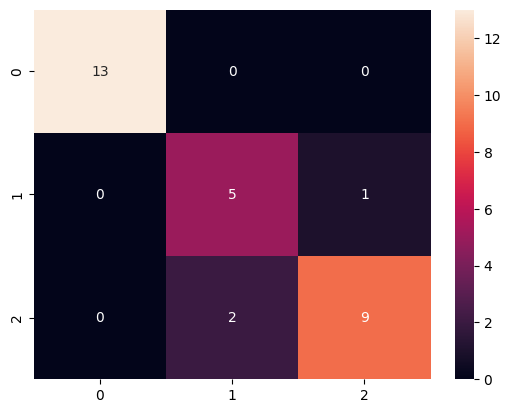

In [ ]:
from sklearn.metrics import confusion_matrix
Confusion_Matrix=confusion_matrix(y_test,y_pred)
print(Confusion_Matrix)
sns.heatmap(Confusion_Matrix,annot=True)
plt.show()


Classification report

In [ ]:
from sklearn.metrics import classification_report
cr=classification_report(y_test,y_pred)
print("Classification Report:")
print(cr)

Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        13
Iris-versicolor       0.71      0.83      0.77         6
 Iris-virginica       0.90      0.82      0.86        11

       accuracy                           0.90        30
      macro avg       0.87      0.88      0.88        30
   weighted avg       0.91      0.90      0.90        30

